In [3]:
import os

import json

In [2]:
exp_dir = "/Users/jakubkucera-sch/Documents/diplomka/FlashRAG/transfered_data"

In [9]:
all_contents = {}

for single_exp in os.listdir(exp_dir):
    print(single_exp)
    single_exp_dir = os.path.join(exp_dir, single_exp)
    # print(os.listdir(single_exp_dir))
    evaluation_file = [f for f in os.listdir(single_exp_dir) if "evaluated_" in f][0]
    file = os.path.join(single_exp_dir, evaluation_file)
    print(file)
    with open(os.path.join(exp_dir, file)) as f:
        contents = json.load(f)
        # print(contents['evaluation_results'])
        all_contents[file] = contents
    # break

nss_v2_2025_04_20_16_45_legal_naive_leave_1_out_test_final_setting
/Users/jakubkucera-sch/Documents/diplomka/FlashRAG/transfered_data/nss_v2_2025_04_20_16_45_legal_naive_leave_1_out_test_final_setting/evaluated_2025_04_20_17_53.json
nss_v2_2025_04_20_17_11_self-rag_leave_1_out_test_final_setting
/Users/jakubkucera-sch/Documents/diplomka/FlashRAG/transfered_data/nss_v2_2025_04_20_17_11_self-rag_leave_1_out_test_final_setting/evaluated_2025_04_20_17_56.json
nss_v2_2025_04_20_13_42_adaptive-rag_leave_1_out_test_final_setting
/Users/jakubkucera-sch/Documents/diplomka/FlashRAG/transfered_data/nss_v2_2025_04_20_13_42_adaptive-rag_leave_1_out_test_final_setting/evaluated_2025_04_20_18_08.json
nss_v2_2025_04_21_13_59_crag_no_web_leave_1_out_test_final_setting
/Users/jakubkucera-sch/Documents/diplomka/FlashRAG/transfered_data/nss_v2_2025_04_21_13_59_crag_no_web_leave_1_out_test_final_setting/evaluated_2025_04_21_14_22.json
nss_v2_2025_04_21_12_04_crag_leave_1_out_test_final_setting
/Users/jakub

In [10]:
questions = {}

In [11]:
for file, contents in all_contents.items():
    for question in contents:
        if question['id'] not in questions:
            questions[question['id']] = {}
        questions[question['id']][file] = question

In [13]:
questions[0]

{'/Users/jakubkucera-sch/Documents/diplomka/FlashRAG/transfered_data/nss_v2_2025_04_20_16_45_legal_naive_leave_1_out_test_final_setting/evaluated_2025_04_20_17_53.json': {'id': 0,
  'question': 'Pokud finanční úřad zadržuje nadměrný odpočet DPH po dobu daňové kontroly, je úroková sazba stanovená jako repo sazba ČNB zvýšená o 2 procentní body v souladu s právem EU, i když daňový subjekt tvrdí, že skutečné náklady na překlenovací úvěr byly vyšší?',
  'golden_answers': ['Podle judikatury Nejvyššího správního soudu, konkrétně rozsudku 8 Afs 274/2022, je úroková sazba ve výši repo sazby ČNB zvýšené o 2 procentní body v souladu s právem EU, pokud pokrývá průměrné náklady na úvěry poskytované nefinančním podnikům. Individuální nároky na náhradu škody převyšující stanovený úrok je třeba uplatnit samostatně, ale samotná sazba je považována za vyhovující požadavkům EU.'],
  'metadata': {'questions_type': 'legal_interpretation',
   'file': '4607_2024.txt'},
  'output': {'retrieval_result': [{'id'

In [30]:
processed_questions_score = []


for question_id, question in questions.items():
    # print(f"Question ID: {question_id}")
    question_success_rate = 0
    question_count = 0
    for file, content in question.items():
        question_success_rate += content['output']['judge_output_score']
        question_count += 1
    question_success_final = question_success_rate / question_count
    print(f"Success rate: {question_success_final:.2f}")
    processed_questions_score.append({
        'question_id': question_id,
        'question_success_rate': question_success_final,
        'question_example_data': content
    })
    # break

Success rate: 0.50
Success rate: 0.61
Success rate: 0.17
Success rate: 0.00
Success rate: 0.00
Success rate: 0.78
Success rate: 0.22
Success rate: 0.61
Success rate: 0.11
Success rate: 0.28
Success rate: 0.11
Success rate: 0.44
Success rate: 0.56
Success rate: 0.22
Success rate: 0.67
Success rate: 0.11
Success rate: 0.39
Success rate: 0.67
Success rate: 0.22
Success rate: 0.28
Success rate: 0.61
Success rate: 0.56
Success rate: 0.61
Success rate: 0.94
Success rate: 0.33
Success rate: 0.06
Success rate: 0.50
Success rate: 0.39
Success rate: 0.44
Success rate: 0.00
Success rate: 0.61
Success rate: 0.28
Success rate: 0.22
Success rate: 0.56
Success rate: 0.50
Success rate: 0.78
Success rate: 0.61
Success rate: 0.50
Success rate: 0.67
Success rate: 0.28
Success rate: 0.33
Success rate: 0.50
Success rate: 0.33
Success rate: 0.11
Success rate: 0.33
Success rate: 0.28
Success rate: 0.28
Success rate: 0.61
Success rate: 0.22
Success rate: 0.22
Success rate: 0.61
Success rate: 0.39
Success rate

In [31]:
processed_questions_score.sort(key=lambda x: x['question_success_rate'], reverse=True)

In [51]:
for question in processed_questions_score:
    print(f"Question ID: {question['question_id']}")
    print(f"Success rate: {question['question_success_rate']:.2f}")
    # print(f"Example data: {question['question_example_data']}")
    # print()

Question ID: 158
Success rate: 1.00
Question ID: 23
Success rate: 0.94
Question ID: 136
Success rate: 0.83
Question ID: 190
Success rate: 0.83
Question ID: 5
Success rate: 0.78
Question ID: 35
Success rate: 0.78
Question ID: 104
Success rate: 0.78
Question ID: 143
Success rate: 0.78
Question ID: 152
Success rate: 0.78
Question ID: 177
Success rate: 0.78
Question ID: 66
Success rate: 0.72
Question ID: 73
Success rate: 0.72
Question ID: 91
Success rate: 0.72
Question ID: 99
Success rate: 0.72
Question ID: 118
Success rate: 0.72
Question ID: 138
Success rate: 0.72
Question ID: 157
Success rate: 0.72
Question ID: 170
Success rate: 0.72
Question ID: 173
Success rate: 0.72
Question ID: 194
Success rate: 0.72
Question ID: 14
Success rate: 0.67
Question ID: 17
Success rate: 0.67
Question ID: 38
Success rate: 0.67
Question ID: 64
Success rate: 0.67
Question ID: 72
Success rate: 0.67
Question ID: 105
Success rate: 0.67
Question ID: 108
Success rate: 0.67
Question ID: 114
Success rate: 0.67
Quest

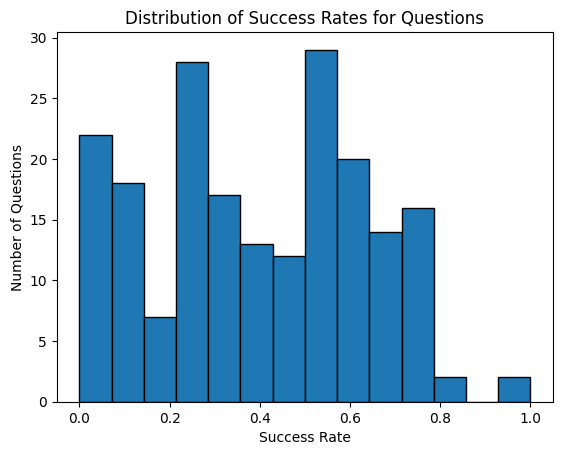

In [109]:

# create a histogram from the distribution of success rates
import matplotlib.pyplot as plt
import numpy as np


success_rates = [question['question_success_rate'] for question in processed_questions_score]
# for bin in range(1, 20):
#     print(f"Bin {bin}: {sum(1 for rate in success_rates if rate >= bin / 14)}")
#     plt.hist(success_rates, bins=bin)
#     plt.show()
plt.hist(success_rates, bins=14, edgecolor='black')
plt.xlabel('Success Rate')
plt.ylabel('Number of Questions')
plt.title('Distribution of Success Rates for Questions')
# plt.savefig(f"/Users/jakubkucera-sch/Documents/diplomka/2025BP_Kucera_RAG_LLM/images/generated_images/flashrag_eva_{dataset}_{metric_name}_alpha_experiment.pdf", bbox_inches='tight')
plt.savefig('/Users/jakubkucera-sch/Documents/diplomka/2025BP_Kucera_RAG_LLM/images/generated_images/flashrag_eva_nss_experiment_result_sucess_rate.pdf', bbox_inches='tight')
plt.show()

In [77]:
# always wrong
# could be good 161
# coumplicated but ok 106, 98, 25, 95

# Always correct
# 100% 158 - answer meh
# 94% - 23 anwer pretty good
# 83% - 136 meh
# 83% - 190 both yes, but details merky
# 5 meh
# 78% - 35 - pretty good answer
# 78% - 104 - example of a bad judge


# 50%
# 34, pretty good (retrieval might be useless)
#       correct in '/Users/jakubkucera-sch/Documents/diplomka/FlashRAG/transfered_data/nss_v2_2025_04_20_14_21_crag_leave_1_out_test_final_setting/evaluated_2025_04_20_17_44.json'
#       Incorrct in TODO a

# 101 pretty good (retrieval could be usefull)
#       correct in '/Users/jakubkucera-sch/Documents/diplomka/FlashRAG/transfered_data/nss_v2_2025_04_20_14_21_crag_leave_1_out_test_final_setting/evaluated_2025_04_20_17_44.json'
#       Incorrct in TODO a

In [128]:
# example_question = questions[101]['/Users/jakubkucera-sch/Documents/diplomka/FlashRAG/transfered_data/nss_v2_2025_04_20_14_21_crag_leave_1_out_test_final_setting/evaluated_2025_04_20_17_44.json']

# example_question = questions[101]['/Users/jakubkucera-sch/Documents/diplomka/FlashRAG/transfered_data/nss_v2_2025_04_20_16_43_zero-shot_test_final_setting/evaluated_2025_04_20_17_52.json']
# example_question = questions[101]['/Users/jakubkucera-sch/Documents/diplomka/FlashRAG/transfered_data/nss_v2_2025_04_20_16_43_zero-shot_test_final_setting/evaluated_2025_04_20_17_52.json']

example_question = questions[101]['/Users/jakubkucera-sch/Documents/diplomka/FlashRAG/transfered_data/nss_v2_2025_04_20_16_54_adaptive-rag_leave_1_out_test_final_setting/evaluated_2025_04_20_17_55.json']
# example_question = questions[101]['/Users/jakubkucera-sch/Documents/diplomka/FlashRAG/transfered_data/nss_v2_2025_04_20_15_45_adaptive-rag_leave_1_out_test_final_setting/evaluated_2025_04_20_17_50.json']
# example_question = questions[101]['/Users/jakubkucera-sch/Documents/diplomka/FlashRAG/transfered_data/nss_v2_2025_04_20_13_42_adaptive-rag_leave_1_out_test_final_setting/evaluated_2025_04_20_18_08.json']

# print(example_question)

# TODO try ['/Users/jakubkucera-sch/Documents/diplomka/FlashRAG/transfered_data/nss_v2_2025_04_20_16_45_legal_naive_leave_1_out_test_final_setting/evaluated_2025_04_20_17_53.json']
# example_question
# questions[106].keys()
# print('question: ' + str(example_question['question']))
print('Q: ' + str(example_question['question']))
print('')
# print('golden_answers: ' + str(example_question['golden_answers'][0]))
print('GA: ' + str(example_question['golden_answers'][0]))
# print('prompt: ' + str(example_question['output']['prompt']))
# print('prompt: ' + str(example_question['output']))
print('')
print('Pred: ' + str(example_question['output']['pred']))
# print('metric_score: ' + str(example_question['output']['metric_score']))
# print('judge_input_prompt: ' + str(example_question['output']['judge_input_prompt']))
print('')
print('Score: ' + str(example_question['output']['judge_output_score']))
# print('Score: ' + str(example_question['output']['judge_output_raw']['explanation']))
print('')
print('LLM Judge: ' + str(json.loads(example_question['output']['judge_output_raw'])['explanation']))

# for d in example_question['output']['retrieval_result']:
#     print('retrieval_result: ' + str(d['contents']))
#     # print('retrieval_result: ' + str(d))

Q: Může být cizinec zajištěn podle § 124 odst. 1 písm. a) zákona o pobytu cizinců pouze z důvodu, že vstoupil na území České republiky v rozporu s aktuálním ochranným opatřením Ministerstva zdravotnictví souvisejícím s pandemií COVID-19, aniž by bylo prokázáno, že reálně ohrožuje veřejné zdraví?

GA: Ne, samotné porušení ochranného opatření Ministerstva zdravotnictví bez prokázání reálného ohrožení veřejného zdraví nestačí k zajištění cizince podle § 124 odst. 1 písm. a) zákona o pobytu cizinců. Je nutné odlišovat narušení veřejného pořádku od ohrožení veřejného zdraví, jak to činí zákon o pobytu cizinců v § 119. Pro zajištění je třeba prokázat skutečné, aktuální a dostatečně závažné ohrožení některého ze základních zájmů společnosti.

Pred:   II. Yes, a cizinec can be detained under § 124 paragraph 1 letter a) of the Aliens Act only if he entered the territory of the Czech Republic in violation of the current protective measure of the Ministry of Health related to the COVID-19 pandemi

In [32]:

len(processed_questions_score)

200

In [33]:
# processed_questions_score
for question in processed_questions_score:
    print(f"Question ID: {question['question_id']}")
    print(f"Success rate: {question['question_success_rate']:.2f}")
    # print(f"Example data: {question['question_example_data']}")
    # print()

Question ID: 158
Success rate: 1.00
Question ID: 23
Success rate: 0.94
Question ID: 136
Success rate: 0.83
Question ID: 190
Success rate: 0.83
Question ID: 5
Success rate: 0.78
Question ID: 35
Success rate: 0.78
Question ID: 104
Success rate: 0.78
Question ID: 143
Success rate: 0.78
Question ID: 152
Success rate: 0.78
Question ID: 177
Success rate: 0.78
Question ID: 66
Success rate: 0.72
Question ID: 73
Success rate: 0.72
Question ID: 91
Success rate: 0.72
Question ID: 99
Success rate: 0.72
Question ID: 118
Success rate: 0.72
Question ID: 138
Success rate: 0.72
Question ID: 157
Success rate: 0.72
Question ID: 170
Success rate: 0.72
Question ID: 173
Success rate: 0.72
Question ID: 194
Success rate: 0.72
Question ID: 14
Success rate: 0.67
Question ID: 17
Success rate: 0.67
Question ID: 38
Success rate: 0.67
Question ID: 64
Success rate: 0.67
Question ID: 72
Success rate: 0.67
Question ID: 105
Success rate: 0.67
Question ID: 108
Success rate: 0.67
Question ID: 114
Success rate: 0.67
Quest